<a href="https://colab.research.google.com/github/raj-vijay/nl/blob/master/07_Russian_Tweets_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Russian Tweets

The dataset contains some Russian tweets associated with Russia's Internet Research Agency and compiled by FiveThirtyEight.

In [1]:
!wget https://github.com/raj-vijay/nl/raw/master/files/russian_tweets.csv

--2021-12-07 18:28:51--  https://github.com/raj-vijay/nl/raw/master/files/russian_tweets.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/raj-vijay/nl/master/files/russian_tweets.csv [following]
--2021-12-07 18:28:51--  https://raw.githubusercontent.com/raj-vijay/nl/master/files/russian_tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120255 (117K) [text/plain]
Saving to: ‘russian_tweets.csv’

russian_tweets.csv  100%[===================>] 117.44K  --.-KB/s    in 0.02s   

2021-12-07 18:28:52 (5.39 MB/s) - ‘russian_tweets.csv’ saved [120255/120255]



In [2]:
import pandas as pd

In [3]:
tweets = pd.read_csv('russian_tweets.csv')

In [4]:
tweets.head()

,Unnamed: 0,content
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...
2,226970,.@vfpatlas well that's a swella word there (di...
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...
4,161610,Жители обстреливаемых районов Донецка проводят...


###1. Character count of Russian tweets

In [5]:
# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

In [6]:
# Print the average character count
print(tweets['char_count'].mean())

103.462


###2. Hashtags and mentions in Russian tweets

Here, we compute the number of hashtags and mentions in each tweet by defining two functions count_hashtags() and count_mentions() respectively and applying them to the content feature of tweets.

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Function that returns number of hashtags in a string
def count_hashtags(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

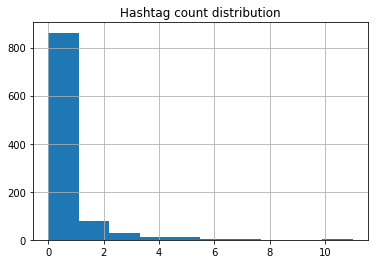

In [9]:
# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

In [10]:
# Function that returns number of mentions in a string
def count_mentions(string):
    # Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

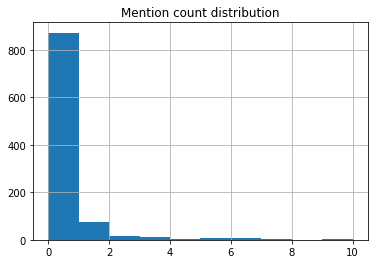

In [11]:
# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets['mention_count'].hist();
plt.title('Mention count distribution');